In [170]:
import pandas as pd

ECLO_df = pd.read_csv('train.csv')

In [171]:
ECLO_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [172]:
ECLO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [173]:
print(ECLO_df['ECLO'].value_counts())

ECLO
3     18675
5      6743
6      4967
1      2578
9      1528
8      1152
4       818
10      611
12      611
11      394
15      283
7       263
13      194
2       150
14      145
16      101
18       89
17       78
20       39
19       36
21       33
24       18
23       17
22       17
26       12
27       11
25        7
28        6
30        5
31        4
34        3
32        3
37        3
33        2
35        2
36        1
40        1
65        1
56        1
47        1
57        1
45        1
52        1
74        1
39        1
66        1
Name: count, dtype: int64


In [174]:
from sklearn.model_selection import train_test_split

# ID, 가해운전자 차종, 가해운전자 성별, 피해운전자 차종, 피해운전자 성별, 삭제
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop(['ID','가해운전자 차종', '가해운전자 성별', '가해운전자 상해정도','피해운전자 차종', '피해운전자 성별','피해운전자 연령', '피해운전자 상해정도','사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)
    return df_copy

In [175]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target=df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test =\
    train_test_split(X_features, y_target, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ECLO_data)

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def get_clf_eval(y_test, pred, pred_proba):
    # 오차 행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC-AUC를 출력하는 함수
# 오차 행렬을 계산합니다. 
# 오차 행렬은 실제 레이블과 예측 레이블을 비교하여 True Positives, False Positives,
# True Negatives, False Negatives의 수를 표시합니다.
    confusion = confusion_matrix(y_test, pred)

# 정확도를 계산합니다.
# 정확도는 전체 데이터 중에서 올바르게 예측된 데이터의 비율입니다.
    accuracy = accuracy_score(y_test, pred)

# 정밀도를 계산합니다.
# 정밀도는 양성으로 예측된 데이터 중 실제로 양성인 데이터의 비율입니다.
    precision = precision_score(y_test, pred)

# 재현율을 계산합니다.
# 재현율(민감도)는 실제 양성 데이터 중 모델이 양성으로 예측한 데이터의 비율입니다.
    recall = recall_score(y_test, pred)

# F1 스코어를 계산합니다.
# F1 스코어는 정밀도와 재현율의 조화 평균이며, 두 지표의 균형을 나타냅니다.
    f1 = f1_score(y_test, pred)

# ROC-AUC 스코어를 계산합니다.
# ROC-AUC는 모델의 수신자 조작 특성 곡선(ROC) 아래의 면적을 측정하며,
# 1에 가까울수록 좋은 성능을 나타냅니다.
    roc_auc = roc_auc_score(y_test, pred_proba)

# 계산된 성능 지표들을 출력합니다.
    print('오차 행렬')
    print(confusion)
    print('\n정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [177]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [178]:
print(ECLO_df['요일'].value_counts())

요일
금요일    6179
화요일    6023
수요일    5969
월요일    5895
목요일    5759
토요일    5670
일요일    4114
Name: count, dtype: int64


In [179]:
ECLO_df['요일'] = le.fit_transform(ECLO_df['요일'])

In [180]:
print(ECLO_df['요일'].value_counts())

요일
0    6179
6    6023
2    5969
3    5895
1    5759
5    5670
4    4114
Name: count, dtype: int64


In [181]:
ECLO_df['사고일시'] = pd.to_datetime(ECLO_df['사고일시'])
ECLO_df['사고일시'] = ECLO_df['사고일시'].dt.month
ECLO_df['사고일시']

0         1
1         1
2         1
3         1
4         1
         ..
39604    12
39605    12
39606    12
39607    12
39608    12
Name: 사고일시, Length: 39609, dtype: int32

In [182]:
print(ECLO_df['기상상태'].value_counts())

기상상태
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: count, dtype: int64


In [183]:
le.fit_transform(ECLO_df['기상상태'])
le.fit_transform(ECLO_df['기상상태'].unique())

array([2, 5, 0, 3, 4, 1])

In [184]:
ECLO_df['기상상태'] = le.fit_transform(ECLO_df['기상상태'])

In [185]:
print(ECLO_df['기상상태'].value_counts())

기상상태
2    36181
3     2627
5      729
0       56
4        8
1        8
Name: count, dtype: int64


In [186]:
ECLO_df['시군구'].value_counts()

시군구
대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: count, Length: 199, dtype: int64

In [187]:
ECLO_df['시군구'] = le.fit_transform(ECLO_df['시군구'])

In [188]:
ECLO_df['시군구'].value_counts()

시군구
0      1749
128    1173
11     1143
112     968
111     938
       ... 
158       2
66        2
161       2
93        2
78        1
Name: count, Length: 199, dtype: int64

In [189]:
ECLO_df['도로형태'].value_counts()

도로형태
단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64

In [190]:
ECLO_df['도로형태'] = le.fit_transform(ECLO_df['도로형태'])

In [191]:
ECLO_df['도로형태'].value_counts()

도로형태
6     19485
1      9931
0      5746
3      1986
2      1474
7       309
10      236
5       232
4       138
8        64
9         8
Name: count, dtype: int64

In [192]:
ECLO_df['노면상태'].value_counts()

노면상태
건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: count, dtype: int64

In [193]:
ECLO_df['노면상태'] = le.fit_transform(ECLO_df['노면상태'])

In [194]:
ECLO_df['노면상태'].value_counts()

노면상태
0    36420
4     3100
1       58
2       25
5        3
3        3
Name: count, dtype: int64

In [195]:
ECLO_df['사고유형'].value_counts()

사고유형
차대차     31785
차대사람     6833
차량단독      991
Name: count, dtype: int64

In [196]:
ECLO_df['사고유형'] = le.fit_transform(ECLO_df['사고유형'])

In [197]:
ECLO_df['사고유형'].value_counts()

사고유형
1    31785
0     6833
2      991
Name: count, dtype: int64

In [198]:
ECLO_df['사고유형 - 세부분류'].value_counts()

사고유형 - 세부분류
측면충돌          17104
기타            10630
추돌             5885
횡단중            2443
정면충돌            837
차도통행중           616
후진중충돌           613
보도통행중           524
길가장자리구역통행중      467
공작물충돌           324
전도전복 - 전도       144
전도전복 - 전복        10
도로외이탈 - 추락        8
도로외이탈 - 기타        4
Name: count, dtype: int64

In [199]:
ECLO_df['사고유형 - 세부분류'] = le.fit_transform(ECLO_df['사고유형 - 세부분류'])

In [200]:
ECLO_df['사고유형 - 세부분류'].value_counts()

사고유형 - 세부분류
11    17104
1     10630
10     5885
12     2443
8       837
9       616
13      613
5       524
2       467
0       324
6       144
7        10
4         8
3         4
Name: count, dtype: int64

In [201]:
ECLO_df['법규위반'].value_counts()

법규위반
안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: count, dtype: int64

In [202]:
ECLO_df['법규위반'] = le.fit_transform(ECLO_df['법규위반'])

In [203]:
ECLO_df['법규위반'].value_counts()

법규위반
7     21876
6      5277
5      3786
1      2750
2      1396
3      1154
9       980
10      949
8       881
4       427
0       133
Name: count, dtype: int64

In [204]:
ECLO_df['가해운전자 연령'].value_counts()

가해운전자 연령
60세       1031
미분류        994
58세        977
53세        956
57세        943
          ... 
90세          2
4세           1
90세 이상       1
98세 이상       1
5세           1
Name: count, Length: 89, dtype: int64

In [205]:
ECLO_df['가해운전자 연령'] = le.fit_transform(ECLO_df['가해운전자 연령'])

In [206]:
ECLO_df['가해운전자 연령'].value_counts()

가해운전자 연령
52    1031
88     994
49     977
44     956
48     943
      ... 
84       2
40       1
85       1
86       1
51       1
Name: count, Length: 89, dtype: int64

이상치 제거

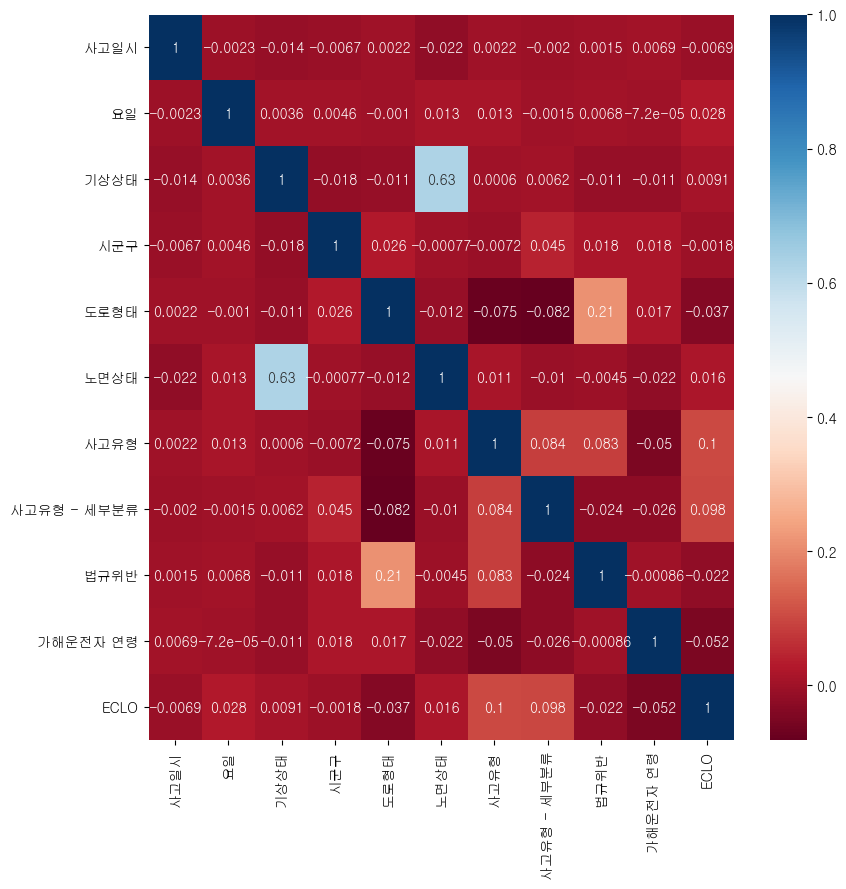

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Gulim'

# 데이터 준비
corr = get_preprocessed_df(ECLO_df).corr()

# 히트맵 생성
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='RdBu', annot=True, annot_kws={"size": 10})
plt.tight_layout()
plt.show()

## ECLO  와 양의 상관관계가 가장 높은것 : 사고유형, 사고유형 - 세부분류
## ECLO  와 음의 상관관계가 가장 높은것 : 가해운전자 연령

### 그러나 test.csv에 따르면 사고유형 - 세부분류, 가해운전자 연령 없으므로 예측 요인에 넣지 말아야한다.
## 이상치 제거는 <span style="color: red;">사고유형 칼럼</span>에서 제거